Dataset contains flight data from 2008, downloaded from http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

In [2]:
# flight data from 2008, narrowed to more manageable size
flights = pd.read_csv('~/Desktop/Data_Science/2008.csv')
flights = flights.iloc[1:10000, ]

In [3]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.shape

(9999, 29)

In [5]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Exploration of data for Departure and Arrival Delays

In [6]:
flights['ArrDelay'].describe()

count    9810.000000
mean       16.760550
std        34.695437
min       -38.000000
25%        -4.000000
50%         6.000000
75%        27.000000
max       500.000000
Name: ArrDelay, dtype: float64

In [7]:
flights['DepDelay'].describe()

count    9836.000000
mean       21.178223
std        33.186917
min       -10.000000
25%         1.000000
50%         9.000000
75%        29.000000
max       508.000000
Name: DepDelay, dtype: float64

Greater variation is evident between the mean and the maximum than the mean and the minimum.

In [8]:
#Selecting data for flights with delays (on departure or arrival) 
#under the 75th quartile, as the maximum has greater variation from 
#the mean than the minimum.

DepDelay = flights.loc[lambda df: flights['DepDelay'] < 29, :]
ArrDelay = flights.loc[lambda df: flights['ArrDelay'] < 27, :]
delayDep = DepDelay['DepDelay']
delayArr = ArrDelay['ArrDelay']

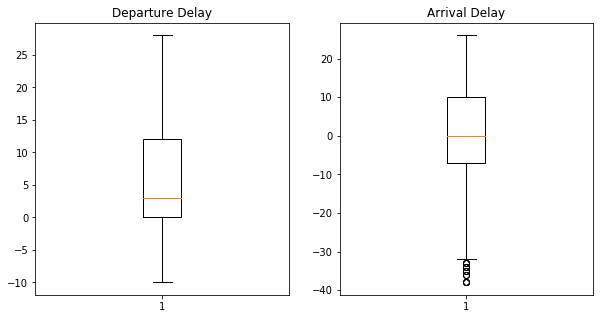

In [9]:
# boxplot of arrival and departure delays
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(delayDep)
plt.title('Departure Delay')

plt.subplot(1, 2, 2)
plt.boxplot(delayArr)
plt.title('Arrival Delay')

plt.show()

Departure delays are mostly by just a few minutes, as displayed the by ICR of around 0 to 12, with no outliers (perhaps because potentially very long delays are more likely to result in a cancelled flight and planes are limited on early departures as passengers would miss their flights).
Arrival Delays show a much larger range, with significant outliers on the early side (likely due to tailwinds reducing flight time).  But, most flights arrive on time or very close to on time, as displayed the median at 0 and the ICR at around -10 to 10.

In [12]:
#Selecting data for flight with delays (on departure or arrival) 
#that are also above the 25th quartile with Histogram to show 
#recurrance of observations.

DepData = DepDelay.loc[lambda df: DepDelay['DepDelay'] > 1]
DepartureData = DepData['DepDelay']

ArrData = ArrDelay.loc[lambda df: ArrDelay['ArrDelay'] > -4]
ArrivalData = ArrData['ArrDelay']

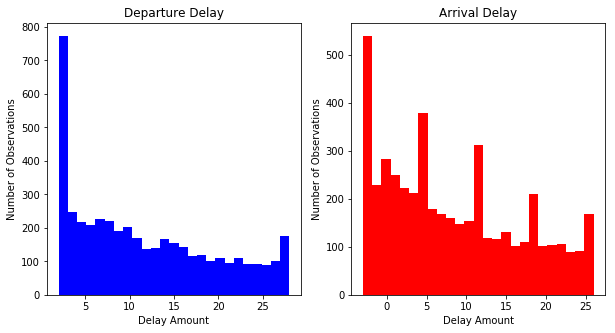

In [18]:
# display histogram of departure and arrival delays
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(DepartureData, bins=25, color='blue')
plt.xlabel('Delay Amount')
plt.ylabel('Number of Observations')
plt.title('Departure Delay')

plt.subplot(1, 2, 2)
plt.hist(ArrivalData, bins=25, color='red')
plt.xlabel('Delay Amount')
plt.ylabel('Number of Observations')
plt.title('Arrival Delay')

plt.show()

The Departure Delays histogram illuminates how often delays are minimal (represented well under 5 minutes), with a fairly consistent number of delays at increasing lengths of time.
The Arrival Delays histogram shows a significant number of ealy arrivals, meaning more flights arrive early than at any other specific delayed amount.  There are additional surges at dpecific delayed amounts, but nothing as significant as the early arrivals.

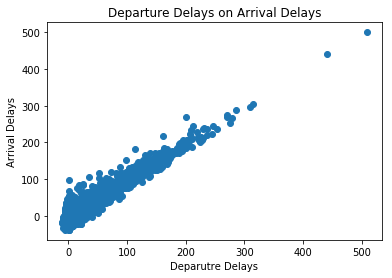

In [17]:
#Scatterplot showing correlation between Arrival Delays 
#and Departure Delays

plt.scatter(x=flights['DepDelay'], y=flights['ArrDelay'])
plt.title('Departure Delays on Arrival Delays')
plt.xlabel('Deparutre Delays')
plt.ylabel('Arrival Delays')
plt.show()

The scatterplot of Arrival Delays of a flight by it's Departure Delay dislays the correlation between the two.  Delayed flights are more likely to arrive late.

In [33]:
#Addition of Adjusted Arrival Delay analysis, which discounts the 
#Departure Delay from the Arrival Delay.  Scatterpot shows impact 
#on Arrival for flights with Departure Delay (value greater than 0)

# define Adjusted Delay as Arrival Delay less Departure Delay
flights['AdjDelay'] = flights['ArrDelay'] - flights['DepDelay']

# isolate flights with Departure Delays
DelayedFlights = flights.loc[lambda df: flights['DepDelay'] > 0, :]
AdjustedDelay = DelayedFlights['AdjDelay']

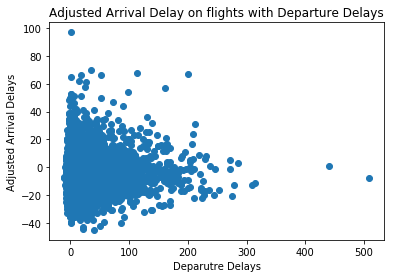

In [19]:
plt.scatter(x=flights['DepDelay'], y=flights['AdjDelay'])
plt.title('Adjusted Arrival Delay on flights with Departure Delays')
plt.xlabel('Deparutre Delays')
plt.ylabel('Adjusted Arrival Delays')
plt.show()

This scatterplot is to explore the correlation between the impact on arrival time of a delayed departure and that departure delay.  Only flights with delayed departure are plotted, showing the amount of variation between the delay of the departure and the delay of the arrival (so a flights with a 5 minute departure delay and 5 minuted arrival delay would show 0 adjusted arrival delay).  It seems there is little to no correlation.  Flights, especially those with small departure delays, show adjusted arrival delays with high variation.

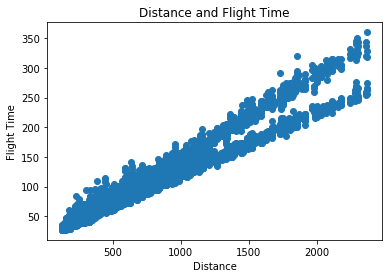

In [36]:
#Scatterplot showing correlation between distance and flight time.

plt.scatter(x=flights['Distance'], y=flights['AirTime'])
plt.title('Distance and Flight Time')
plt.xlabel('Distance')
plt.ylabel('Flight Time')
plt.show()

This scatterplot shows the correlation between distance travelled and flight time.  While there is clearly a correlation, there i also an interested divergence on the longer distances.  This is likely due to flights in different directions (eastbound vs westbound) receiving either positive or negative impact from tailwinds.  The longer the flight, the larger the impact on travel time.